<a href="https://colab.research.google.com/github/AmitHasanShuvo/COVID-19-Analysis-of-Bangladesh/blob/master/COVID_19_Analysis_on_Bangladesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Author: Kazi Amit Hasan

**This notebook represents the analysis of the novel coronavirus in Bangladesh.

**Please follow ther rules of government and stay safe. **

The documentatiosns will be added soon. Feel free to give me with feedbacks.

Please upvote if you like it.

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv
Saving covid_19_data.csv to covid_19_data.csv


In [0]:
dataset=pd.read_csv("covid_19_clean_complete.csv")


In [4]:
dataset.shape


(31535, 8)

In [5]:
dataset.describe()


,Lat,Long,Confirmed,Deaths,Recovered
count,31535.000000,31535.000000,3.153500e+04,31535.000000,31535.000000
mean,21.181891,22.881195,4.809217e+03,320.232218,1439.529761
std,24.904267,70.245542,4.314993e+04,2982.791704,10408.836504
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,1.900000e+01,0.000000,1.000000
75%,41.153300,78.000000,4.370000e+02,6.000000,102.000000
max,71.706900,178.065000,1.528568e+06,91921.000000,289392.000000


In [6]:
daily = dataset.sort_values(['Date','Country/Region','Province/State'])
latest = dataset[dataset.Date == daily.Date.max()]
latest.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
28620,NaN,Afghanistan,33.0000,65.0000,5/9/20,4033,115,502
28621,NaN,Albania,41.1533,20.1683,5/9/20,856,31,627
28622,NaN,Algeria,28.0339,1.6596,5/9/20,5558,494,2546
28623,NaN,Andorra,42.5063,1.5218,5/9/20,754,48,545
28624,NaN,Angola,-11.2027,17.8739,5/9/20,43,2,13


In [7]:
data=latest.rename(columns={ "Country/Region": "country", "Province/State": "state","Confirmed":"confirm","Deaths": "death","Recovered":"recover"})
data.head()

,state,country,Lat,Long,Date,confirm,death,recover
28620,NaN,Afghanistan,33.0000,65.0000,5/9/20,4033,115,502
28621,NaN,Albania,41.1533,20.1683,5/9/20,856,31,627
28622,NaN,Algeria,28.0339,1.6596,5/9/20,5558,494,2546
28623,NaN,Andorra,42.5063,1.5218,5/9/20,754,48,545
28624,NaN,Angola,-11.2027,17.8739,5/9/20,43,2,13


In [8]:
dgc=data.groupby("country")[['confirm', 'death', 'recover']].sum().reset_index()

dgc.head()

,country,confirm,death,recover
0,Afghanistan,4033,115,502
1,Albania,856,31,627
2,Algeria,5558,494,2546
3,Andorra,754,48,545
4,Angola,43,2,13


In [9]:
import folium
worldmap = folium.Map(location=[32.4279,53.6880 ], zoom_start=4,tiles='Stamen Toner')

for Lat, Long, state in zip(data['Lat'], data['Long'],data['state']):
    folium.CircleMarker([Lat, Long],
                        radius=5,
                        color='red',
                      popup =('State: ' + str(state) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(worldmap)
worldmap

In [10]:
fig = px.bar(dgc[['country', 'confirm']].sort_values('confirm', ascending=False), 
             y="confirm", x="country", color='country', 
             log_y=True, template='ggplot2', title='Confirmed Cases')
fig.show()

In [11]:
fig = px.bar(dgc[['country', 'recover']].sort_values('recover', ascending=False), 
             y="recover", x="country", color='country', 
             log_y=True, template='ggplot2', title='Recovered Cases')
fig.show()

In [12]:
fig = px.bar(dgc[['country', 'death']].sort_values('death', ascending=False), 
             y="death", x="country", color='country', 
             log_y=True, template='ggplot2', title='Death')
fig.show()

In [13]:
bd_data = dataset[dataset['Country/Region']=='Bangladesh']
bdata = bd_data.tail(22)
bdata.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
30230,NaN,Bangladesh,23.685,90.3563,5/15/20,20065,298,3882
30495,NaN,Bangladesh,23.685,90.3563,5/16/20,20995,314,4117
30760,NaN,Bangladesh,23.685,90.3563,5/17/20,22268,328,4373
31025,NaN,Bangladesh,23.685,90.3563,5/18/20,23870,349,4585
31290,NaN,Bangladesh,23.685,90.3563,5/19/20,25121,370,4993


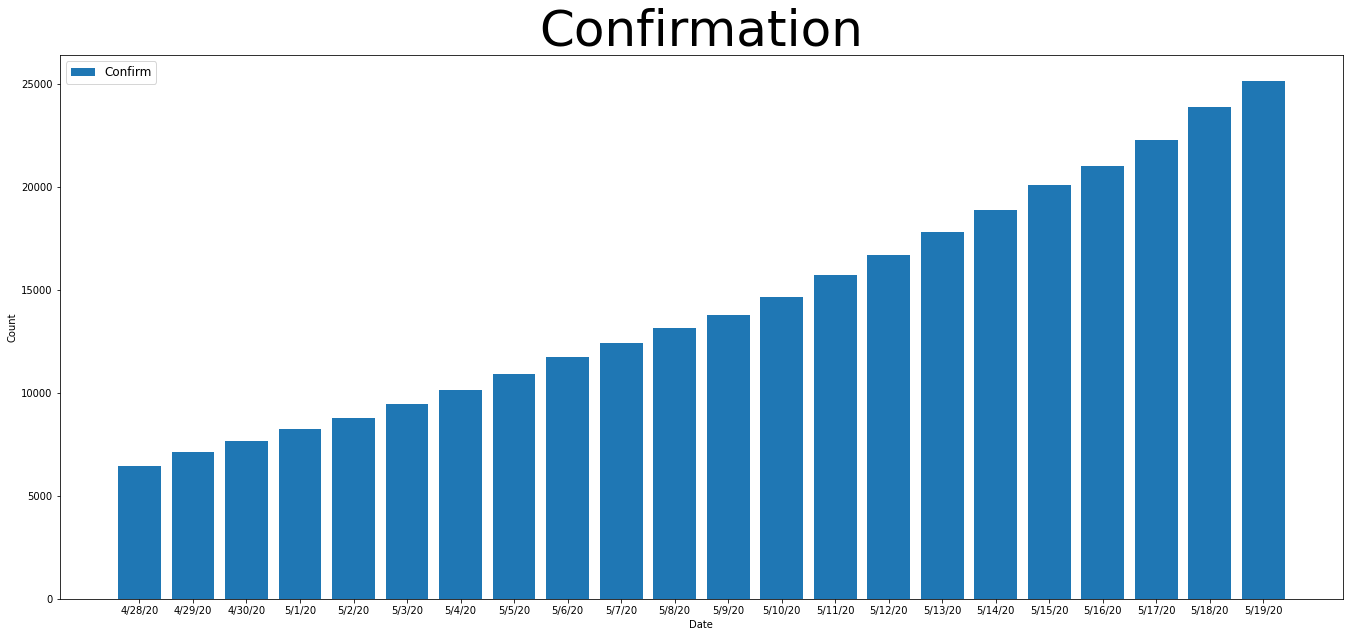

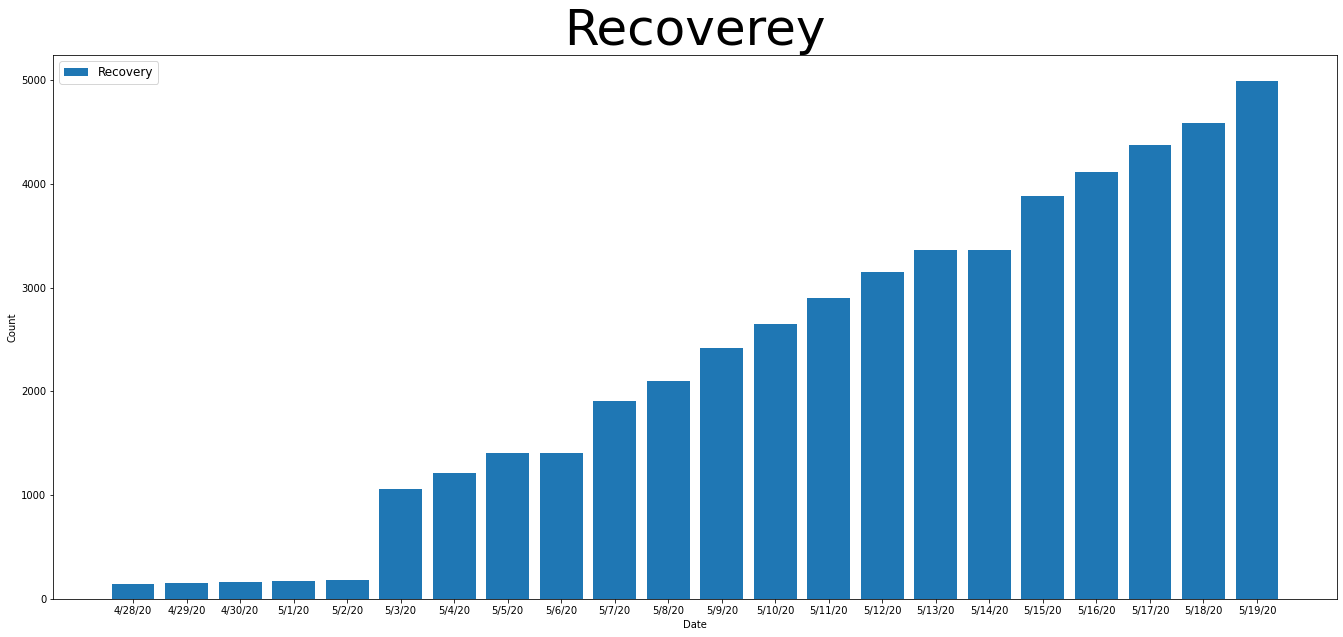

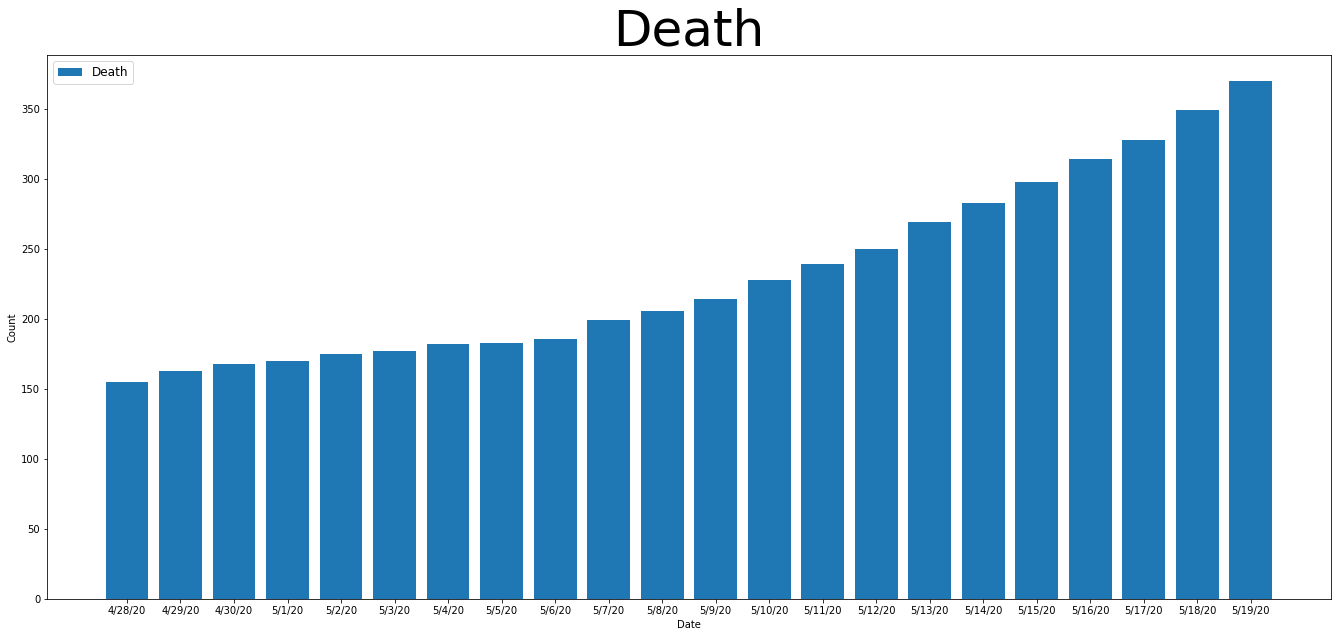

In [14]:
plt.figure(figsize=(23,10))
plt.bar(bdata.Date, bdata.Confirmed,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title("Confirmation",fontsize=50)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(bdata.Date, bdata.Recovered,label="Recovery")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title("Recoverey",fontsize=50)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(bdata.Date, bdata.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title("Death",fontsize=50)
plt.show()

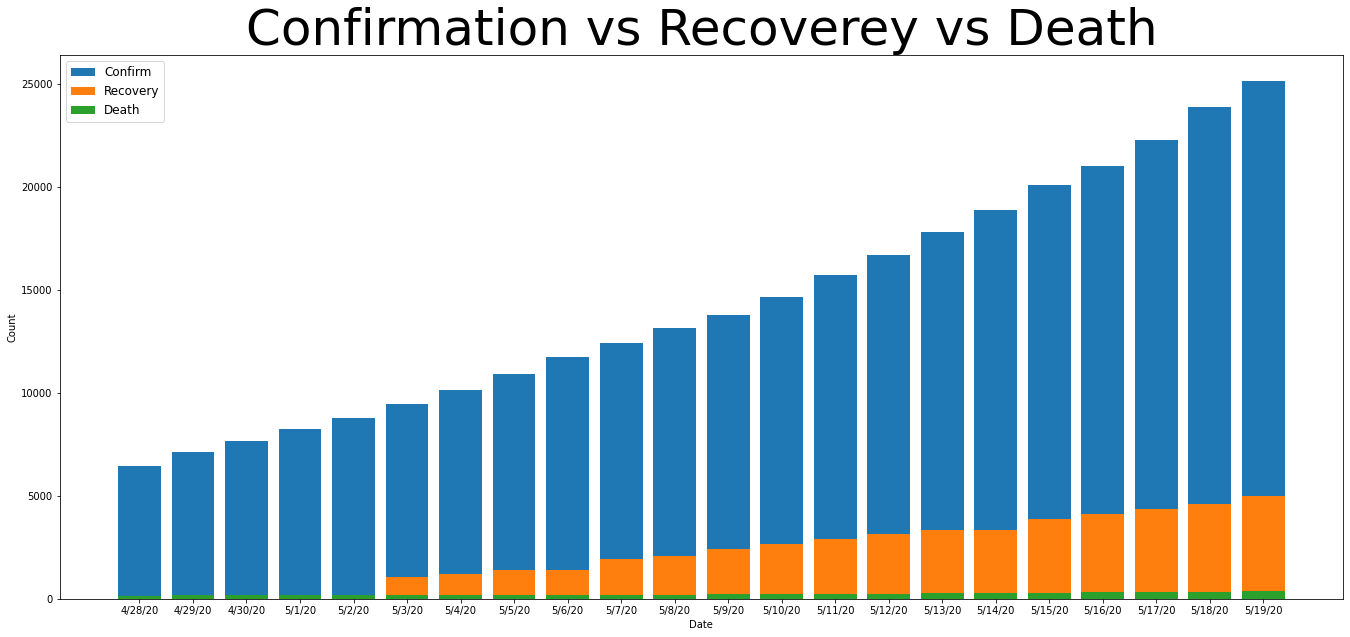

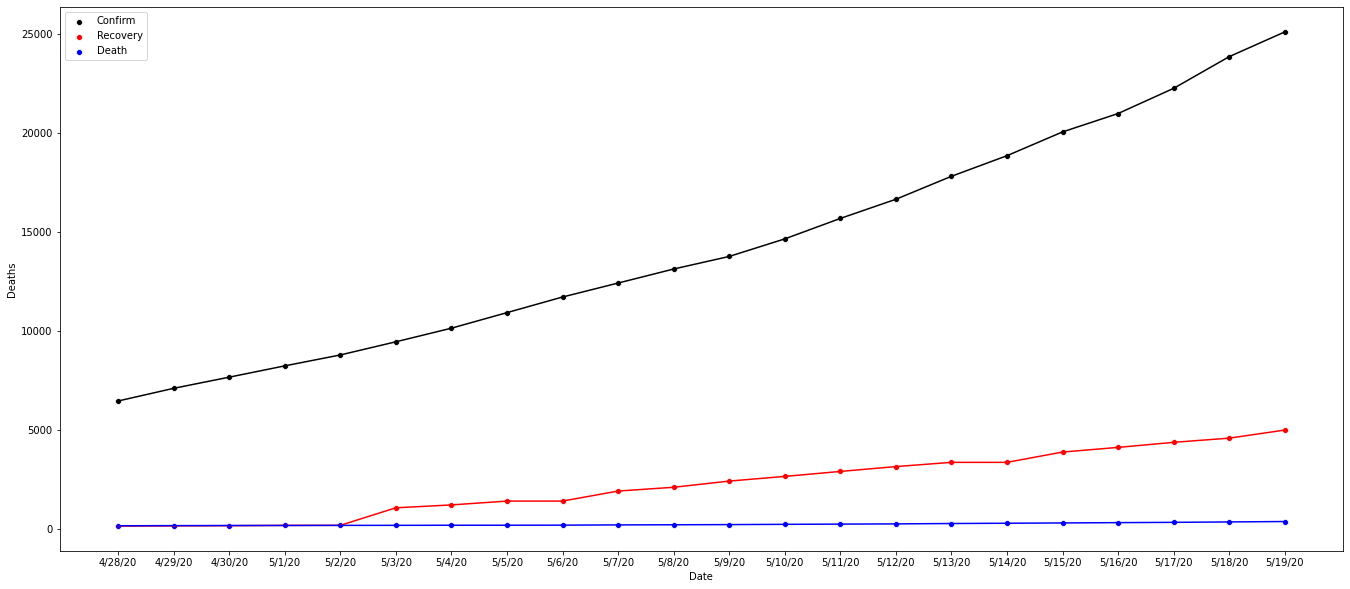

In [15]:
plt.figure(figsize=(23,10))
plt.bar(bdata.Date, bdata.Confirmed,label="Confirm")
plt.bar(bdata.Date, bdata.Recovered,label="Recovery")
plt.bar(bdata.Date, bdata.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title("Confirmation vs Recoverey vs Death",fontsize=50)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="Confirmed", data=bdata,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="Date", y="Recovered", data=bdata,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=bdata,
             color="blue",label = "Death")
plt.plot(bdata.Date,bdata.Confirmed,zorder=1,color="black")
plt.plot(bdata.Date,bdata.Recovered,zorder=1,color="red")
plt.plot(bdata.Date,bdata.Deaths,zorder=1,color="blue")

In [16]:
bdata['Confirmed_new'] = bdata['Confirmed']-bdata['Confirmed'].shift(1)
bdata['Recovered_new'] = bdata['Recovered']-bdata['Recovered'].shift(1)
bdata['Deaths_new'] = bdata['Deaths']-bdata['Deaths'].shift(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [0]:
bdata = bdata.fillna(0)


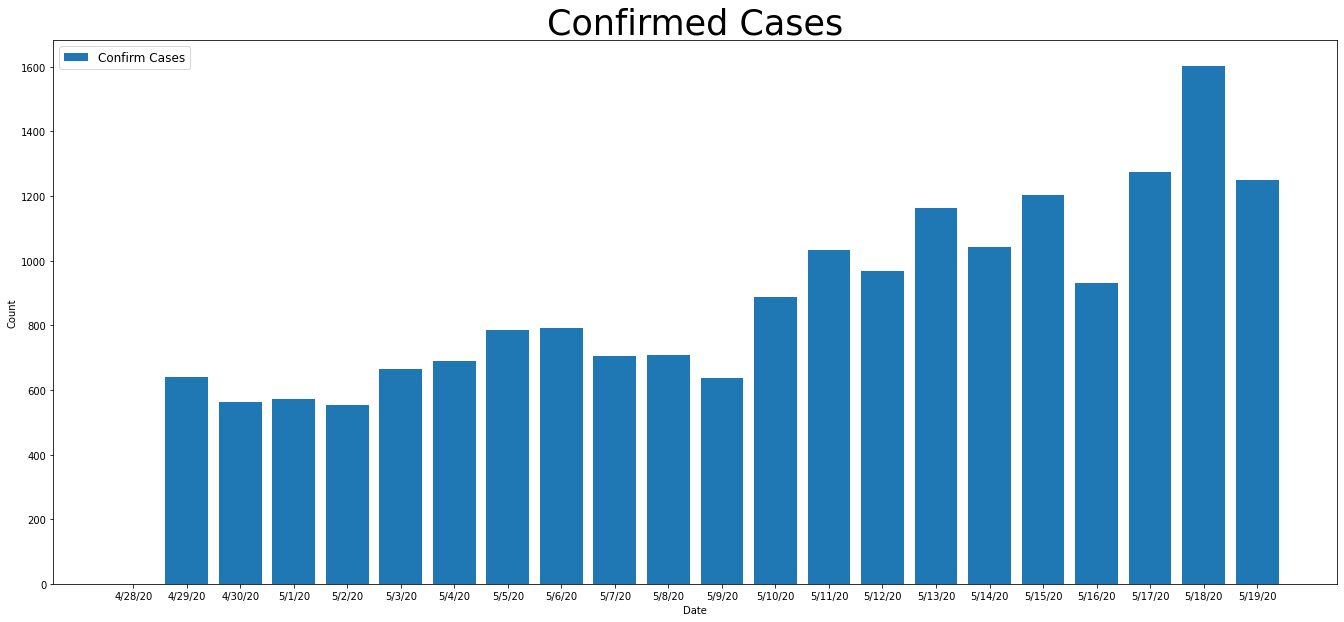

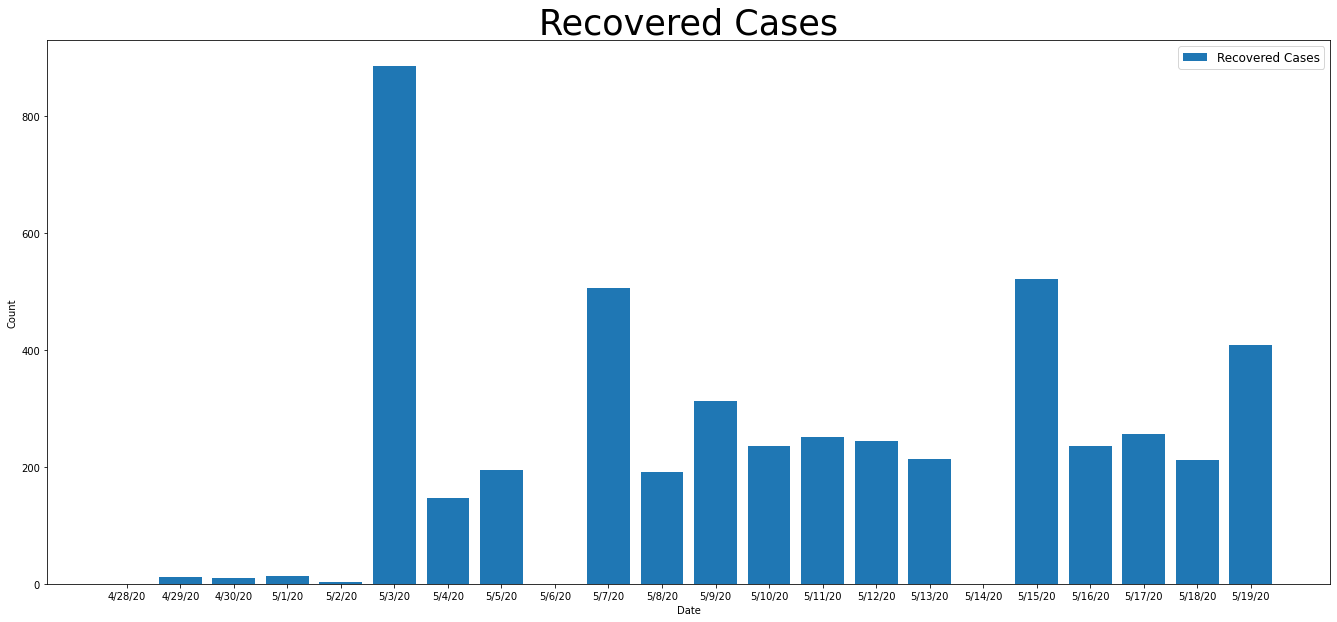

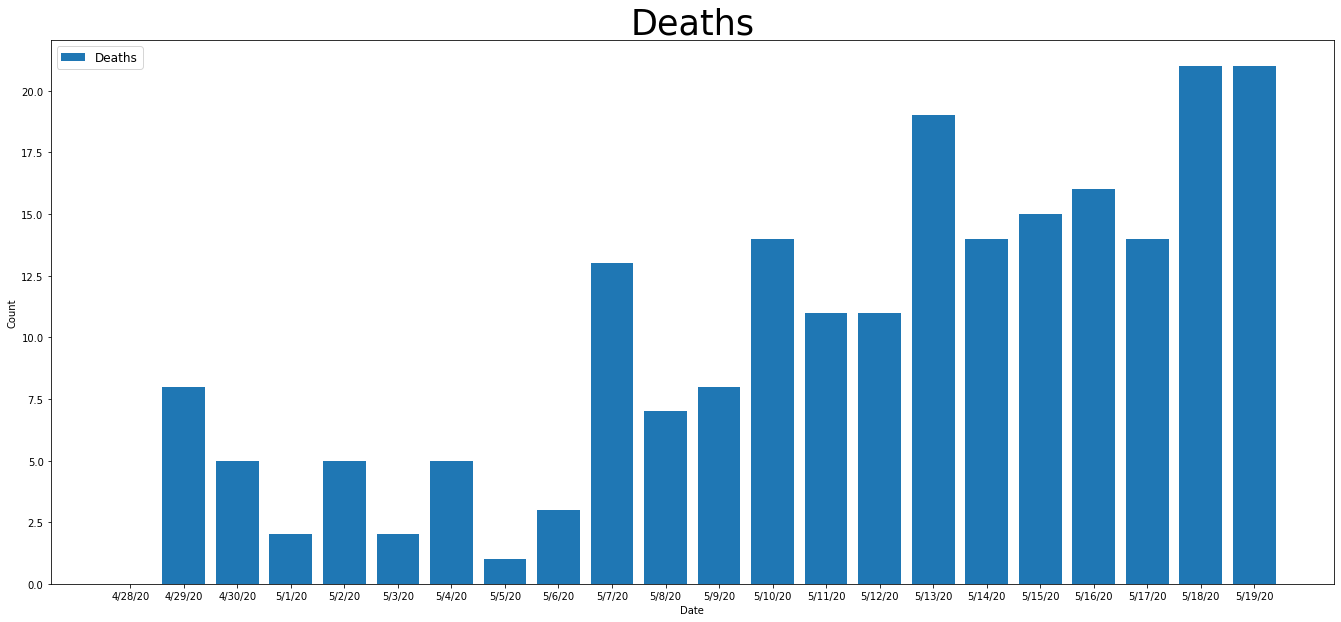

In [18]:
plt.figure(figsize=(23,10))
plt.bar(bdata.Date, bdata.Confirmed_new,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases',fontsize = 35)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(bdata.Date, bdata.Recovered_new,label="Recovered Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovered Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(bdata.Date, bdata.Deaths_new,label="Deaths")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Deaths',fontsize = 35)
plt.show()

In [19]:
bdata.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Confirmed_new,Recovered_new,Deaths_new
25725,0,Bangladesh,23.685,90.3563,4/28/20,6462,155,139,0.0,0.0,0.0
25990,0,Bangladesh,23.685,90.3563,4/29/20,7103,163,150,641.0,11.0,8.0
26255,0,Bangladesh,23.685,90.3563,4/30/20,7667,168,160,564.0,10.0,5.0
26520,0,Bangladesh,23.685,90.3563,5/1/20,8238,170,174,571.0,14.0,2.0
26785,0,Bangladesh,23.685,90.3563,5/2/20,8790,175,177,552.0,3.0,5.0


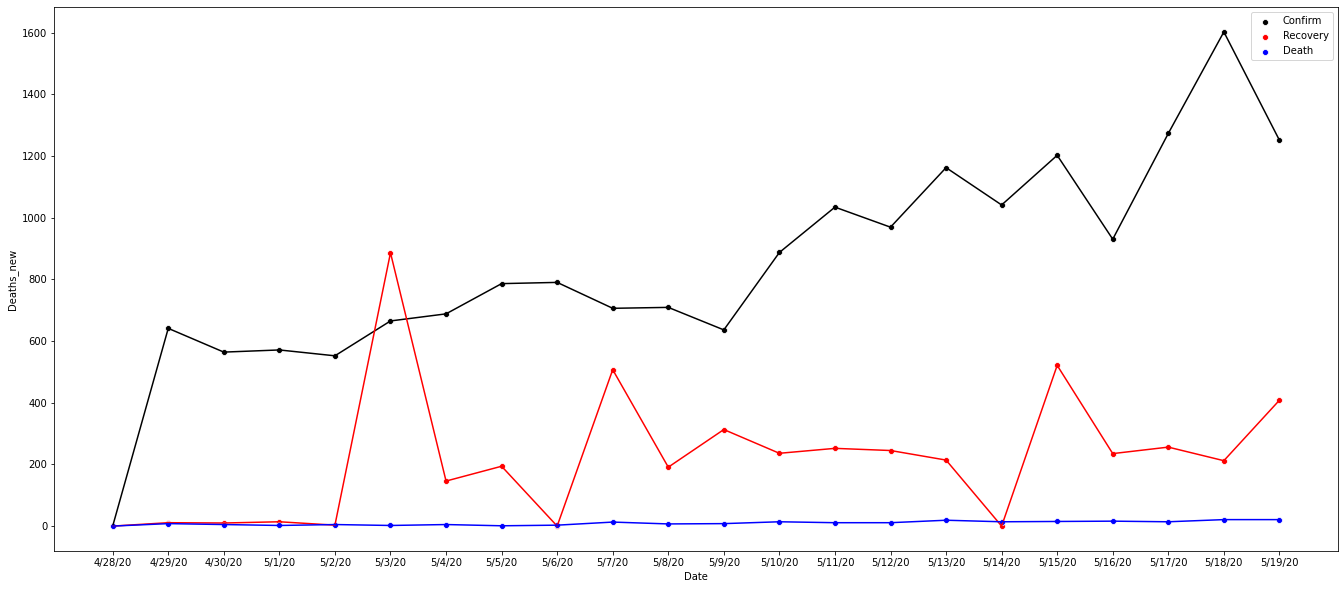

In [20]:
f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="Confirmed_new", data=bdata,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="Date", y="Recovered_new", data=bdata,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths_new", data=bdata,
             color="blue",label = "Death")
plt.plot(bdata.Date,bdata.Confirmed_new,zorder=1,color="black")
plt.plot(bdata.Date,bdata.Recovered_new,zorder=1,color="red")
plt.plot(bdata.Date,bdata.Deaths_new,zorder=1,color="blue")

In [21]:
dgd=data.groupby("Date")[['confirm', 'death', 'recover']].sum().reset_index()

dgd.head()

,Date,confirm,death,recover
0,5/9/20,4024003,279311,1344278


In [0]:
r_cm = float(dgd.recover/dgd.confirm)
d_cm = float(dgd.death/dgd.confirm)

In [23]:
print("The percentage of recovery after confirmation is "+ str(r_cm*100) )
print("The percentage of death after confirmation is "+ str(d_cm*100) )

The percentage of recovery after confirmation is 33.40648602896171
The percentage of death after confirmation is 6.9411230558227714


In [0]:
global_data = pd.read_csv("covid_19_data.csv")

In [0]:
# This functions smooths data, thanks to Dan Pearson. We will use it to smooth the data for growth factor.
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    #plots
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    table3.plot() 
    plt.show()
    table2['GrowthFactor'].plot(title='Growth Factor')
    plt.plot(x_coordinates, y_coordinates) 
    plt.show()
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()

    return 

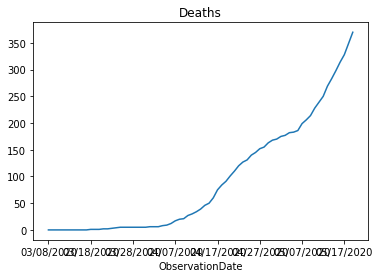

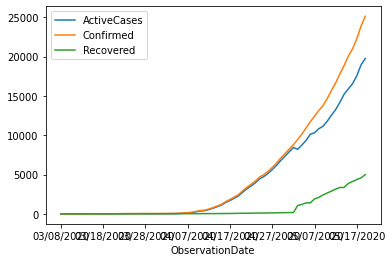

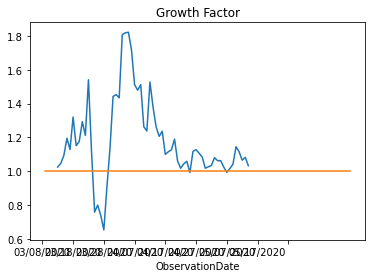

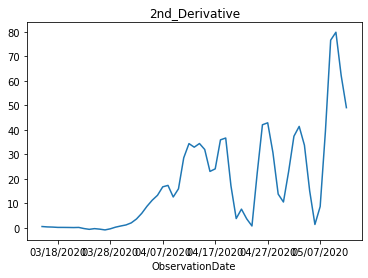

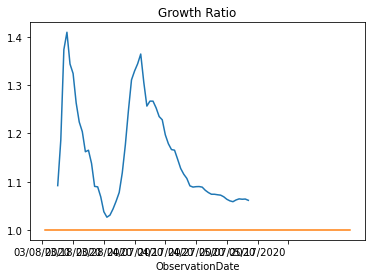

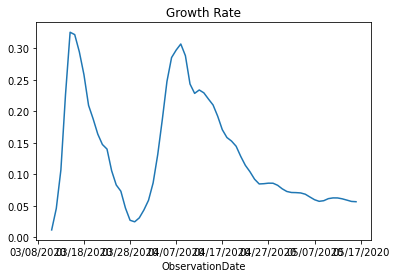

In [26]:
plot_country_active_confirmed_recovered('Bangladesh')


In [27]:
prophet=bd_data.iloc[: , [4,5 ]].copy() 
prophet.head()
prophet.columns = ['ds','y']
prophet.head()

,ds,y
20,1/22/20,0
285,1/23/20,0
550,1/24/20,0
815,1/25/20,0
1080,1/26/20,0


In [28]:
m=Prophet()
m.fit(prophet)
future=m.make_future_dataframe(periods=15)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.143039,-584.663418,577.507696,-5.143039,-5.143039,-43.185667,-43.185667,-43.185667,-43.185667,-43.185667,-43.185667,0.0,0.0,0.0,-48.328705
1,2020-01-23,-5.027529,-604.056686,541.429921,-5.027529,-5.027529,-31.030039,-31.030039,-31.030039,-31.030039,-31.030039,-31.030039,0.0,0.0,0.0,-36.057568
2,2020-01-24,-4.912018,-625.804099,554.002239,-4.912018,-4.912018,-10.622136,-10.622136,-10.622136,-10.622136,-10.622136,-10.622136,0.0,0.0,0.0,-15.534154
3,2020-01-25,-4.796508,-647.521438,549.116556,-4.796508,-4.796508,-28.450431,-28.450431,-28.450431,-28.450431,-28.450431,-28.450431,0.0,0.0,0.0,-33.246939
4,2020-01-26,-4.680998,-576.104609,606.268507,-4.680998,-4.680998,-16.026324,-16.026324,-16.026324,-16.026324,-16.026324,-16.026324,0.0,0.0,0.0,-20.707322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-05-30,31153.059766,30392.213543,31949.164413,30720.686930,31673.055497,-28.450431,-28.450431,-28.450431,-28.450431,-28.450431,-28.450431,0.0,0.0,0.0,31124.609335
130,2020-05-31,31924.668556,31092.756045,32791.898165,31421.767242,32526.408618,-16.026324,-16.026324,-16.026324,-16.026324,-16.026324,-16.026324,0.0,0.0,0.0,31908.642232
131,2020-06-01,32696.277345,31931.261210,33699.035974,32123.543606,33349.455554,44.696347,44.696347,44.696347,44.696347,44.696347,44.696347,0.0,0.0,0.0,32740.973693
132,2020-06-02,33467.886135,32675.592911,34475.720181,32813.359875,34217.468429,84.618250,84.618250,84.618250,84.618250,84.618250,84.618250,0.0,0.0,0.0,33552.504384


In [29]:
cnfrm = forecast.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm=cnfrm.tail(15)
cnfrm.columns = ['Date','Confirm']
cnfrm.head()

,Date,Confirm
119,2020-05-20,23436.971872
120,2020-05-21,24208.580662
121,2020-05-22,24980.189451
122,2020-05-23,25751.798241
123,2020-05-24,26523.407030


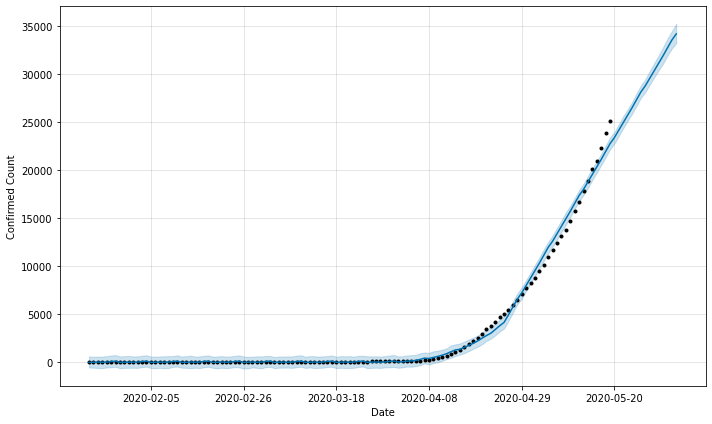

In [30]:
figure = plot_plotly(m, forecast)
py.iplot(figure) 

figure = m.plot(forecast,xlabel='Date',ylabel='Confirmed Count')

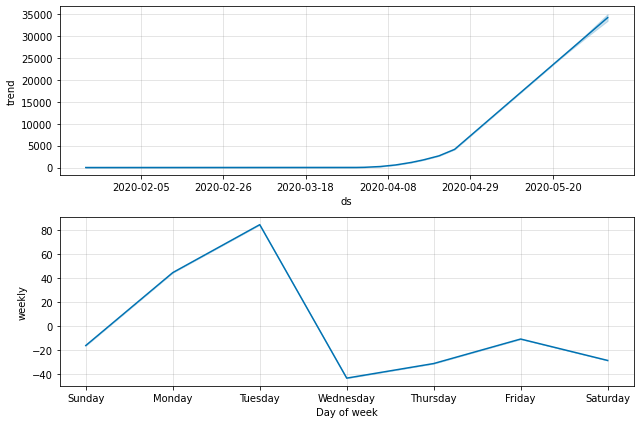

In [31]:
figure=m.plot_components(forecast)


In [32]:
prophet_rec=bd_data.iloc[: , [4,7 ]].copy() 
prophet_rec.head()
prophet_rec.columns = ['ds','y']
prophet_rec.head()

,ds,y
20,1/22/20,0
285,1/23/20,0
550,1/24/20,0
815,1/25/20,0
1080,1/26/20,0


In [33]:
m1=Prophet()
m1.fit(prophet_rec)
future_rec=m1.make_future_dataframe(periods=15)
forecast_rec=m1.predict(future_rec)
forecast_rec

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,17.212204,-399.691681,333.923153,17.212204,17.212204,-36.115776,-36.115776,-36.115776,-36.115776,-36.115776,-36.115776,0.0,0.0,0.0,-18.903572
1,2020-01-23,16.359386,-398.506617,330.703618,16.359386,16.359386,-34.191326,-34.191326,-34.191326,-34.191326,-34.191326,-34.191326,0.0,0.0,0.0,-17.831940
2,2020-01-24,15.506568,-367.315995,371.247919,15.506568,15.506568,-20.322617,-20.322617,-20.322617,-20.322617,-20.322617,-20.322617,0.0,0.0,0.0,-4.816049
3,2020-01-25,14.653750,-360.856912,350.339480,14.653750,14.653750,-17.733038,-17.733038,-17.733038,-17.733038,-17.733038,-17.733038,0.0,0.0,0.0,-3.079288
4,2020-01-26,13.800932,-321.996423,416.211379,13.800932,13.800932,29.433404,29.433404,29.433404,29.433404,29.433404,29.433404,0.0,0.0,0.0,43.234336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-05-30,5498.375812,5092.802219,5839.367330,5416.903958,5590.600840,-17.733038,-17.733038,-17.733038,-17.733038,-17.733038,-17.733038,0.0,0.0,0.0,5480.642774
130,2020-05-31,5645.965912,5270.379020,6031.197396,5553.198626,5752.036869,29.433404,29.433404,29.433404,29.433404,29.433404,29.433404,0.0,0.0,0.0,5675.399316
131,2020-06-01,5793.556012,5445.343738,6230.234521,5688.492174,5913.713874,31.646775,31.646775,31.646775,31.646775,31.646775,31.646775,0.0,0.0,0.0,5825.202787
132,2020-06-02,5941.146113,5593.121757,6374.209012,5821.016084,6077.701044,47.282579,47.282579,47.282579,47.282579,47.282579,47.282579,0.0,0.0,0.0,5988.428692


In [34]:
rec = forecast_rec.loc[:,['ds','trend']]
rec = rec[rec['trend']>0]
rec=rec.tail(15)
rec.columns = ['Date','Recovery']
rec.head()

,Date,Recovery
119,2020-05-20,4022.474809
120,2020-05-21,4170.064910
121,2020-05-22,4317.655010
122,2020-05-23,4465.245110
123,2020-05-24,4612.835210


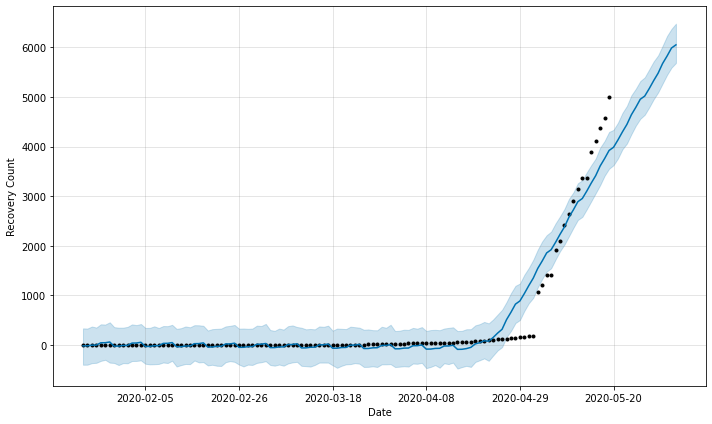

In [35]:
figure_rec = plot_plotly(m1, forecast_rec)
py.iplot(figure_rec) 

figure_rec = m1.plot(forecast_rec,xlabel='Date',ylabel='Recovery Count')

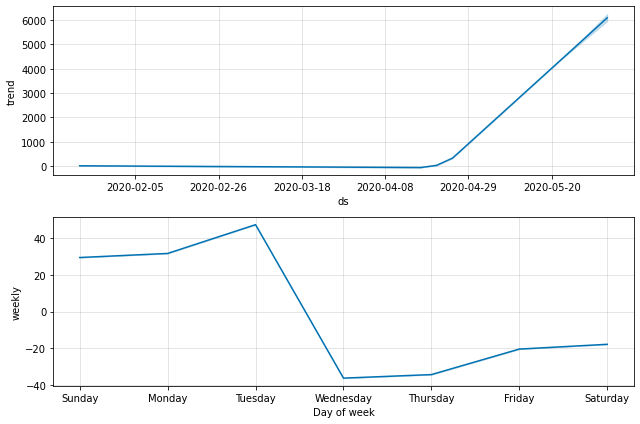

In [36]:
figure_rec=m1.plot_components(forecast_rec)


In [37]:
prophet_dth=bd_data.iloc[: , [4,6 ]].copy() 
prophet_dth.head()
prophet_dth.columns = ['ds','y']
prophet_dth.head()

,ds,y
20,1/22/20,0
285,1/23/20,0
550,1/24/20,0
815,1/25/20,0
1080,1/26/20,0


In [38]:
m2=Prophet()
m2.fit(prophet_dth)
future_dth=m2.make_future_dataframe(periods=15)
forecast_dth=m2.predict(future_dth)
forecast_dth

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.271789,-15.001186,9.841193,-1.271789,-1.271789,-1.122776,-1.122776,-1.122776,-1.122776,-1.122776,-1.122776,0.0,0.0,0.0,-2.394565
1,2020-01-23,-1.222673,-13.992710,9.900692,-1.222673,-1.222673,-0.706088,-0.706088,-0.706088,-0.706088,-0.706088,-0.706088,0.0,0.0,0.0,-1.928761
2,2020-01-24,-1.173557,-13.920522,10.298459,-1.173557,-1.173557,-0.421805,-0.421805,-0.421805,-0.421805,-0.421805,-0.421805,0.0,0.0,0.0,-1.595362
3,2020-01-25,-1.124442,-13.344738,11.225516,-1.124442,-1.124442,-0.043514,-0.043514,-0.043514,-0.043514,-0.043514,-0.043514,0.0,0.0,0.0,-1.167955
4,2020-01-26,-1.075326,-13.917590,11.159869,-1.075326,-1.075326,-0.036760,-0.036760,-0.036760,-0.036760,-0.036760,-0.036760,0.0,0.0,0.0,-1.112086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-05-30,405.168794,391.304681,418.933468,401.057105,410.152565,-0.043514,-0.043514,-0.043514,-0.043514,-0.043514,-0.043514,0.0,0.0,0.0,405.125280
130,2020-05-31,413.063497,399.017785,428.149952,408.337181,418.815743,-0.036760,-0.036760,-0.036760,-0.036760,-0.036760,-0.036760,0.0,0.0,0.0,413.026737
131,2020-06-01,420.958201,408.229679,436.514786,415.634756,427.397660,0.906829,0.906829,0.906829,0.906829,0.906829,0.906829,0.0,0.0,0.0,421.865030
132,2020-06-02,428.852905,415.751260,444.757300,422.809027,436.210648,1.424113,1.424113,1.424113,1.424113,1.424113,1.424113,0.0,0.0,0.0,430.277018


In [39]:
dth = forecast_dth.loc[:,['ds','trend']]
dth = dth[dth['trend']>0]
dth=dth.tail(15)
dth.columns = ['Date','Death']
dth.head()

,Date,Death
119,2020-05-20,326.221757
120,2020-05-21,334.116461
121,2020-05-22,342.011164
122,2020-05-23,349.905868
123,2020-05-24,357.800572


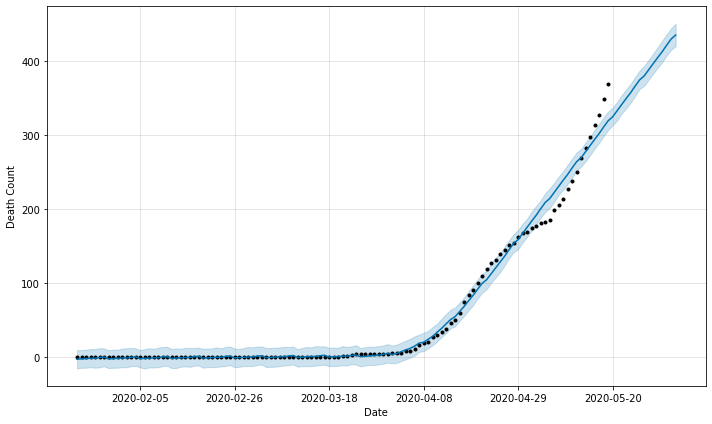

In [40]:
figure_dth = plot_plotly(m2, forecast_dth)
py.iplot(figure_dth) 

figure_dth = m2.plot(forecast_dth,xlabel='Date',ylabel='Death Count')

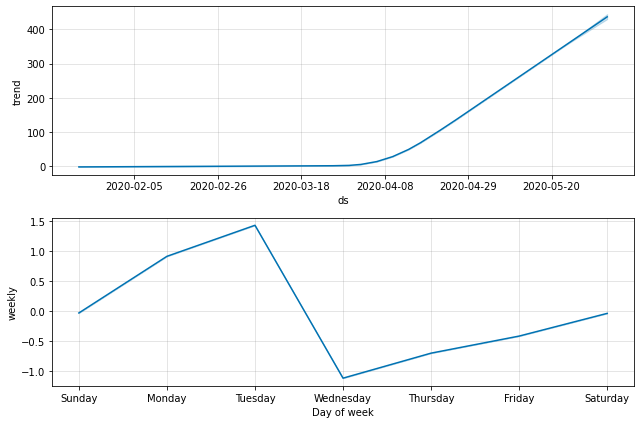

In [41]:
figure_dth=m2.plot_components(forecast_dth)


In [42]:
prediction = cnfrm
prediction['Recover'] = rec.Recovery
prediction['Death'] = dth.Death
prediction.head()

,Date,Confirm,Recover,Death
119,2020-05-20,23436.971872,4022.474809,326.221757
120,2020-05-21,24208.580662,4170.064910,334.116461
121,2020-05-22,24980.189451,4317.655010,342.011164
122,2020-05-23,25751.798241,4465.245110,349.905868
123,2020-05-24,26523.407030,4612.835210,357.800572


In [0]:
pr_pps = float(prediction.Recover.sum()/prediction.Confirm.sum())
pd_pps = float(prediction.Death.sum()/prediction.Confirm.sum())

In [44]:
print("The percentage of Predicted recovery after confirmation is "+ str(pr_pps*100) )
print("The percentage of Predicted Death after confirmation is "+ str(pd_pps*100) )

The percentage of Predicted recovery after confirmation is 17.530912664943145
The percentage of Predicted Death after confirmation is 1.322843453453371
